Log lidar data to csv

https://docs.python.org/3/library/csv.html

In [31]:
import time
from datetime import datetime
import random
import csv
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

from lidar import lidar
SENSOR_PORT = '/dev/ttyUSB0'

Format for logging

In [3]:
def get_now():
    """Return formatted now time string"""
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")

get_now()

'2019-05-01 14:08:58.414416'

In [4]:
lidar_sensor = lidar(SENSOR_PORT)

In [6]:
lidar_sensor.read_lidar()

30

## Check how fast we can capture readings from the lidar - theoretically at 100 Hz

In [7]:
def get_time_ms():
    """Helper to return the time in milliseconds."""
    return int(round(time.time() * 1000))

In [8]:
get_time_ms()

1556716154162

Lets see how fast we can take 10 readings

In [9]:
t0 = get_time_ms()
readings = {}
Hz = 50

for i in range(300):
    readings[get_time_ms() - t0] = lidar_sensor.read_lidar()
    time.sleep(1/Hz) # 20 Hz
    
# readings

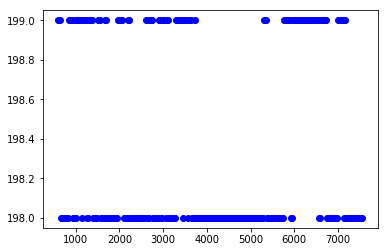

In [10]:
plt.plot(list(readings.keys()), list(readings.values()), 'bo');

OK lets write data to csv -> https://projects.raspberrypi.org/en/projects/temperature-log/5

In [29]:
def csv_writer(data, csv_file_path):
    """
    Write data list to a CSV file path.
    """
    with open(csv_file_path, "a") as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerow(data)

Setup data capture

In [12]:
csv_path = 'data.csv'

def prepare_csv(csv_path : str):
    """create a new file if it doesn't exist or delete existing."""
    if csv_path in os.listdir():
        os.remove(csv_path)
        print("Deleted existing {}".format(csv_path))

    csv_writer(['time', 'reading'], csv_path) # Create first line in file
    print("Created new {}".format(csv_path))

In [13]:
prepare_csv(csv_path)

Deleted existing data.csv
Created new data.csv


In [14]:
%%time
for i in range(10000):
    csv_writer([get_now(), random.random()], csv_path)

CPU times: user 1.96 s, sys: 420 ms, total: 2.38 s
Wall time: 2.41 s


In [15]:
df = pd.read_csv(csv_path, index_col=0)

In [16]:
df.head()

reading
time                                
2019-05-01 14:10:17.990891  0.069292
2019-05-01 14:10:17.991789  0.700608
2019-05-01 14:10:17.992323  0.217495
2019-05-01 14:10:17.992757  0.428021
2019-05-01 14:10:17.993308  0.517275

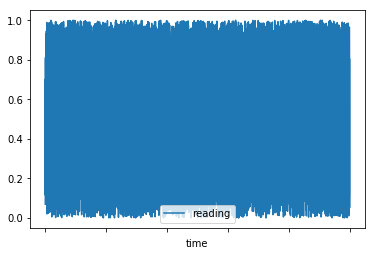

In [17]:
df.plot();

## Capture lidar data
Capture data at 50Hz for 1 minute

In [18]:
CAPTURE_HZ = 1
CAPTURE_MINUTES = 1

In [19]:
number_of_readings = CAPTURE_MINUTES * 60 * CAPTURE_HZ # to be captured
number_of_readings

60

In [20]:
csv_path = 'data_test.csv'
prepare_csv(csv_path)

Created new data_test.csv


In [21]:
%%time
for i in range(number_of_readings):
    csv_writer([get_now(), lidar_sensor.read_lidar()], csv_path)
    time.sleep(1/CAPTURE_HZ)

CPU times: user 9.11 s, sys: 1.29 s, total: 10.4 s
Wall time: 1min 10s


In [22]:
df = pd.read_csv(csv_path, index_col=0)
df.head()

reading
time                               
2019-05-01 14:10:42.623200      198
2019-05-01 14:10:48.638807       30
2019-05-01 14:10:49.701327       30
2019-05-01 14:10:50.763027      199
2019-05-01 14:10:51.824596      199

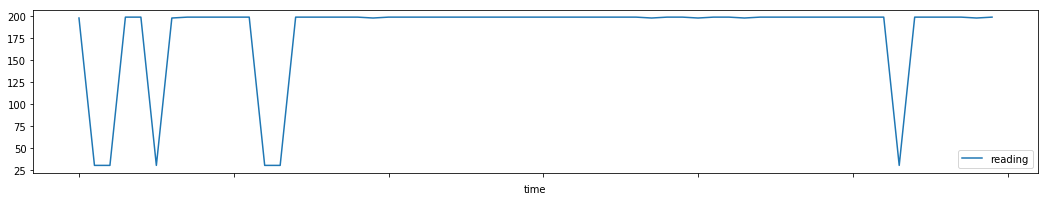

In [23]:
df.plot(figsize=(18,3));

## Helpers
Write some generic helpers for logging data for 2 lidar - use a columns list to define cols and data to capture

In [24]:
columns = ['time', 'sensor_1', 'sensor_2'] # the columns to use in the csv

In [25]:
def generate_csv_file(columns):
    """
    create a new csv file with appropriate columns.
    
    columns : a list of columns titles.
    """
    
    csv_path = "data_" + datetime.now().strftime("%Y-%m-%d_%H:%M") + ".csv"
    csv_writer(columns, csv_path) # Create first line in file
    print("Created file {}".format(csv_path))
    return csv_path

In [27]:
data_file = generate_csv_file(columns)

Created file data_2019-05-01_14:13.csv


In [28]:
data_sample_1 = [get_now(), 100, 200]

In [30]:
csv_writer(data=data_sample_1, csv_file_path=data_file)

In [33]:
json.dumps(data_sample_1)

'["2019-05-01 14:14:04.449948", 100, 200]'